In [54]:
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix,matthews_corrcoef,roc_auc_score,roc_curve,auc

In [2]:
with open("kddcup dataset description.txt",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target']
print(len(columns))

42


In [4]:
with open("training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [5]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}
df = pd.read_csv('kddcup.data_10_percent_corrected.csv',names=columns)
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [6]:
df.shape

(494021, 43)

In [7]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [8]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [9]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.isnull().sum() #to check the presence of null values 

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
df.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

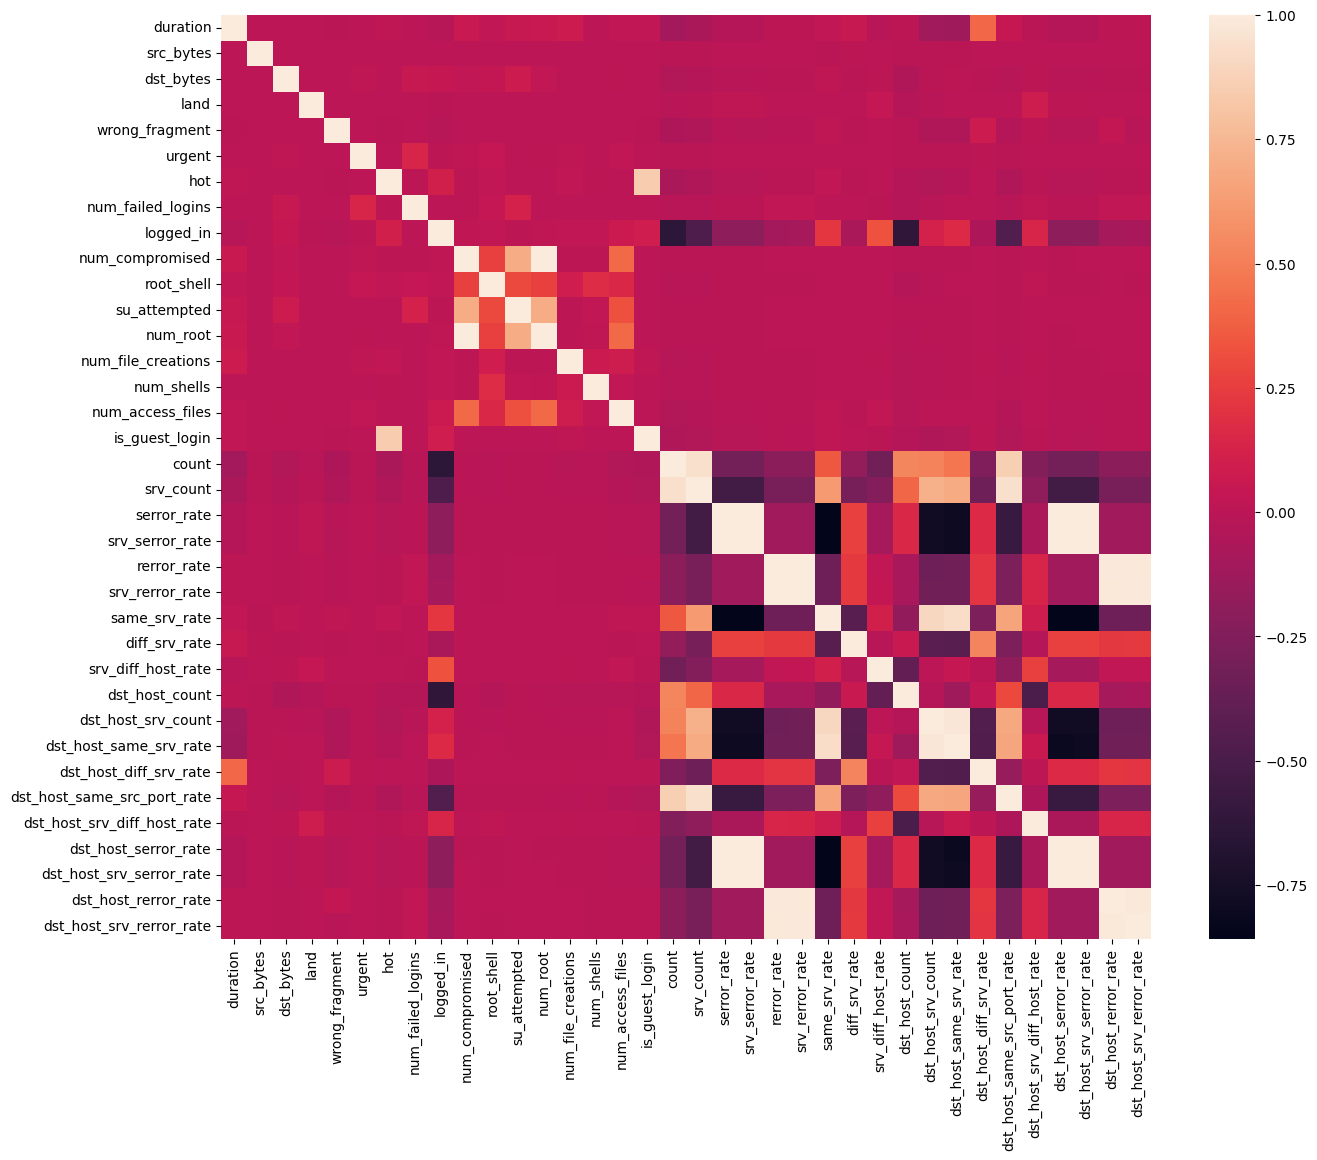

In [12]:
df = df.dropna('columns')# drop columns with NaN

df = df.drop(['is_host_login','num_outbound_cmds'],axis=1)# keep columns where there are more than 1 unique values
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [13]:
df.drop(['num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate'],axis = 1,inplace = True)
#from the heatmap highly correlated features were discarded

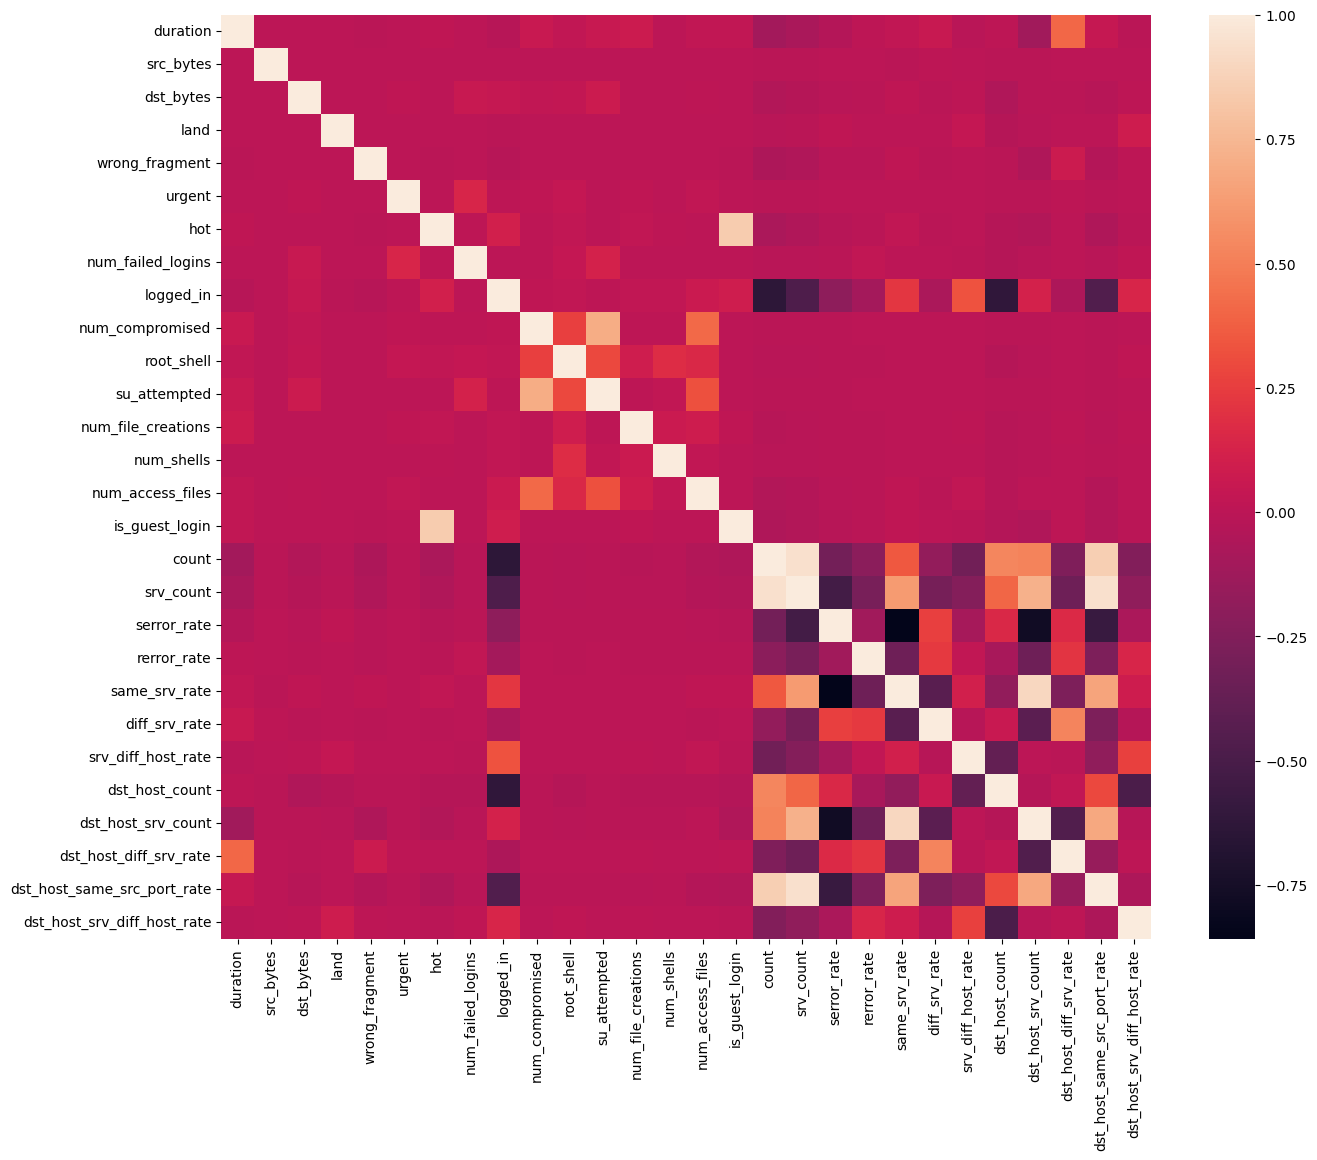

In [14]:
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [15]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'flag', 'protocol_type']

In [16]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

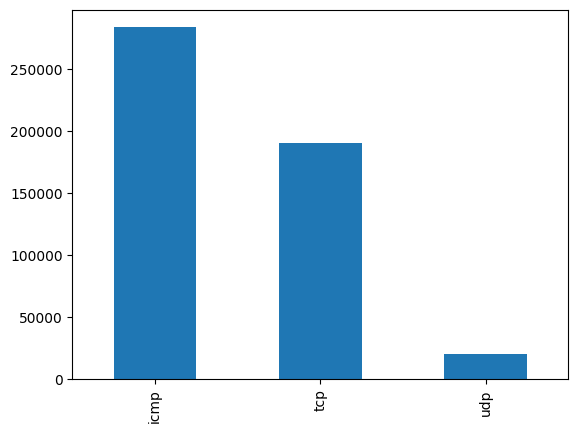

In [17]:
bar_graph('protocol_type')

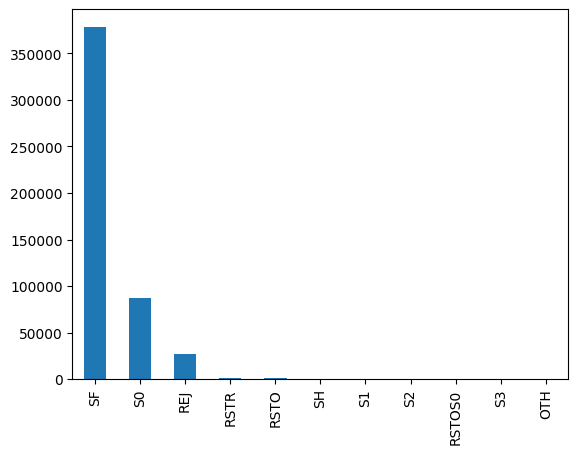

In [18]:
bar_graph('flag')

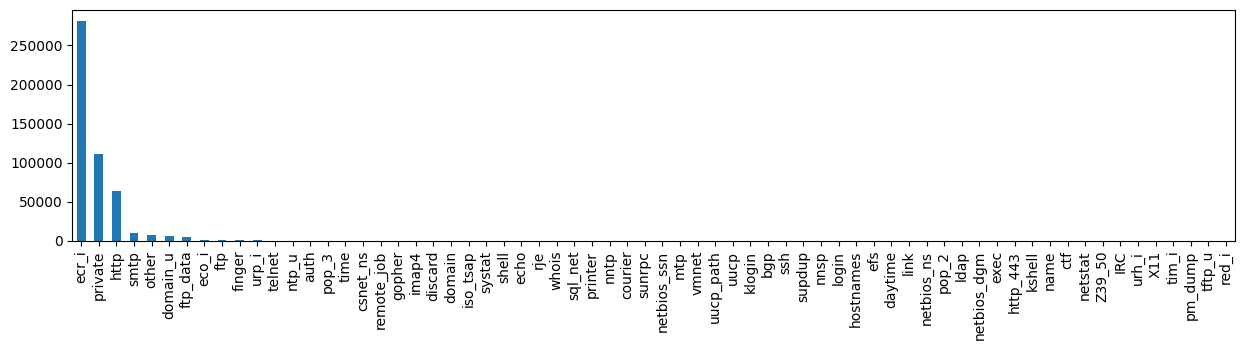

In [19]:
plt.figure(figsize=(15,3))
bar_graph('service')

In [20]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [21]:
df.shape


(494021, 33)

In [22]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [23]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [24]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [25]:
cate_cols.remove('service')
df.drop('service',axis = 1,inplace= True)
df = pd.get_dummies(df, columns=cate_cols)
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
494017,0,282,2286,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
494018,0,203,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
494019,0,291,1200,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
df = df.drop(['target'], axis=1)#not needed as attack type is the target attribute
print(df.shape)

(494021, 43)


In [27]:
# Target variable and train set
y = df['Attack Type']
x = df.drop(['Attack Type'], axis=1)
col = x.columns
feats = list(x.columns)
print('x:\n',x)

print('y:\n',y)
y

x:
         duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_RSTR  

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494016    normal
494017    normal
494018    normal
494019    normal
494020    normal
Name: Attack Type, Length: 494021, dtype: object

In [28]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
x = sc.fit_transform(x)

print('After normalisation(x): ',x)

After normalisation(x):  [[0.00000000e+00 2.61041764e-07 1.05713002e-03 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.44690506e-07 9.42688423e-05 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.38921627e-07 2.59336301e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 2.92770597e-07 2.32762574e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.19685930e-07 2.32762574e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.15846112e-07 2.39357513e-04 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [29]:
if isinstance(y, np.ndarray):
    y = pd.DataFrame(y)
if isinstance(x, np.ndarray):
    x = pd.DataFrame(x , columns = col )

In [30]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 42) (163027, 42)
(330994,) (163027,)


In [31]:
X_train 
#xtrain_col = X_train.columns
#xtrain_col
#print(X_train)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,protocol_type_icmp,protocol_type_tcp,protocol_type_udp
482186,0.025202,2.120063e-07,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
302290,0.000000,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9330,0.000000,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
91417,0.000103,4.142055e-06,0.000065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
293169,0.000000,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.000000,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
365838,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,0.000000,1.488371e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
146867,0.156714,2.120063e-07,0.000020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
Y_train

482186    normal
302290       dos
9330         dos
91417     normal
293169       dos
           ...  
259178       dos
365838       dos
131932       dos
146867    normal
121958       dos
Name: Attack Type, Length: 330994, dtype: object

In [33]:
def entropy(data):
    labels, counts = np.unique(data, return_counts=True)
    p = counts / len(data)
    entropy = -np.sum(p * np.log2(p))
    return entropy

target_entropy = entropy(y)
target_entropy


0.8064972508679831

In [34]:
def information_gain(data, feature, target_entropy):
    values, counts = data[feature].value_counts().index, data[feature].value_counts().values
    subset_entropy = 0
    for value, count in zip(values, counts):
        subset = data[data[feature] == value]
        subset_entropy += count / len(data) * entropy(subset['Attack Type'])
    info_gain = target_entropy - subset_entropy
    return info_gain


#pd.concat([X_train, pd.DataFrame(Y_train, columns=['Attack Type'])], axis=1), column

In [35]:
info_gains = {}
for feature in X_train.columns:
    info_gains[feature] = information_gain(pd.concat([X_train, pd.DataFrame(Y_train, columns=['Attack Type'])], axis=1), feature, target_entropy)

In [36]:
# Sort the features by information gain in descending order
selected_features = sorted(info_gains, key=info_gains.get, reverse=True)

# Print information gain for each feature
for feature in selected_features:
    print(f'Information Gain for Feature {feature}: {info_gains[feature]:.4f}')

Information Gain for Feature src_bytes: 0.6985
Information Gain for Feature count: 0.6698
Information Gain for Feature dst_bytes: 0.5454
Information Gain for Feature srv_count: 0.3966
Information Gain for Feature logged_in: 0.3958
Information Gain for Feature dst_host_same_src_port_rate: 0.3890
Information Gain for Feature dst_host_count: 0.3218
Information Gain for Feature dst_host_srv_diff_host_rate: 0.2942
Information Gain for Feature protocol_type_icmp: 0.2778
Information Gain for Feature dst_host_srv_count: 0.2115
Information Gain for Feature dst_host_diff_srv_rate: 0.2070
Information Gain for Feature srv_diff_host_rate: 0.1706
Information Gain for Feature protocol_type_tcp: 0.1299
Information Gain for Feature diff_srv_rate: 0.1101
Information Gain for Feature same_srv_rate: 0.1009
Information Gain for Feature protocol_type_udp: 0.0861
Information Gain for Feature serror_rate: 0.0846
Information Gain for Feature flag_S0: 0.0642
Information Gain for Feature duration: 0.0636
Informa

In [37]:
k = 20  # Set the desired number of top-k features
top_k_features = selected_features[:k]

# Extract the top-k features from the training and testing sets
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]
top_k_features


['src_bytes',
 'count',
 'dst_bytes',
 'srv_count',
 'logged_in',
 'dst_host_same_src_port_rate',
 'dst_host_count',
 'dst_host_srv_diff_host_rate',
 'protocol_type_icmp',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'srv_diff_host_rate',
 'protocol_type_tcp',
 'diff_srv_rate',
 'same_srv_rate',
 'protocol_type_udp',
 'serror_rate',
 'flag_S0',
 'duration',
 'flag_SF']

In [38]:
from sklearn.feature_selection import SelectKBest, chi2
k = 20  # Number of top features to select
selector = SelectKBest(chi2, k=k)
selector.fit(X_train, Y_train)

# Get the scores and p-values for each feature
scores = selector.scores_
pvalues = selector.pvalues_

# Create a DataFrame to store the feature scores and p-values
feature_scores_df = {'Feature': X_train.columns, 'Score': scores, 'p-value': pvalues}
print(feature_scores_df)

# Sort the features based on their scores in descending order
features_chi2 = feature_scores_df['Feature'].sort_values(ascending=False)


{'Feature': Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'flag_OTH', 'flag_REJ', 'flag_RSTO',
       'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3',
       'flag_SF', 'flag_SH', 'protocol_type_icmp', 'protocol_type_tcp',
       'protocol_type_udp'],
      dtype='object'), 'Score': array([1.09181522e+03, 8.83621341e+01, 8.56495128e+02, 2.05954533e+00,
       1.83671876e+02, 6.69424909e+02, 4.04941353e+04, 2.18168323e+03,
       1.82621878e+05, 6.96300529e+00, 5.81496739e+04, 3.88816687e+

In [39]:
features_chi2 = list(features_chi2)
features_chi2

['wrong_fragment',
 'urgent',
 'su_attempted',
 'srv_diff_host_rate',
 'srv_count',
 'src_bytes',
 'serror_rate',
 'same_srv_rate',
 'root_shell',
 'rerror_rate',
 'protocol_type_udp',
 'protocol_type_tcp',
 'protocol_type_icmp',
 'num_shells',
 'num_file_creations',
 'num_failed_logins',
 'num_compromised',
 'num_access_files',
 'logged_in',
 'land',
 'is_guest_login',
 'hot',
 'flag_SH',
 'flag_SF',
 'flag_S3',
 'flag_S2',
 'flag_S1',
 'flag_S0',
 'flag_RSTR',
 'flag_RSTOS0',
 'flag_RSTO',
 'flag_REJ',
 'flag_OTH',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'dst_host_count',
 'dst_bytes',
 'diff_srv_rate',
 'count']

In [40]:
top_features = []
for feat in features_chi2:
    if feat in top_k_features:
        top_features.append(feat)
top_features

['srv_diff_host_rate',
 'srv_count',
 'src_bytes',
 'serror_rate',
 'same_srv_rate',
 'protocol_type_udp',
 'protocol_type_tcp',
 'protocol_type_icmp',
 'logged_in',
 'flag_SF',
 'flag_S0',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'dst_host_count',
 'dst_bytes',
 'diff_srv_rate',
 'count']

In [41]:
X = df.loc[:,
['srv_diff_host_rate',
 'srv_count',
 'src_bytes',
 'serror_rate',
 'same_srv_rate',
 'protocol_type_udp',
 'protocol_type_tcp',
 'protocol_type_icmp',
 'logged_in',
 'flag_SF',
 'flag_S0',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_diff_srv_rate',
 'dst_host_count',
 'dst_bytes',
 'diff_srv_rate',
 'count']]
X

,srv_diff_host_rate,srv_count,src_bytes,serror_rate,same_srv_rate,protocol_type_udp,protocol_type_tcp,protocol_type_icmp,logged_in,flag_SF,flag_S0,duration,dst_host_srv_diff_host_rate,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_diff_srv_rate,dst_host_count,dst_bytes,diff_srv_rate,count
0,0.00,8,181,0.00,1.0,0,1,0,1,1,0,0,0.00,9,0.11,0.0,9,5450,0.0,8
1,0.00,8,239,0.00,1.0,0,1,0,1,1,0,0,0.00,19,0.05,0.0,19,486,0.0,8
2,0.00,8,235,0.00,1.0,0,1,0,1,1,0,0,0.00,29,0.03,0.0,29,1337,0.0,8
3,0.00,6,219,0.00,1.0,0,1,0,1,1,0,0,0.00,39,0.03,0.0,39,1337,0.0,6
4,0.00,6,217,0.00,1.0,0,1,0,1,1,0,0,0.00,49,0.02,0.0,49,2032,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.40,5,310,0.00,1.0,0,1,0,1,1,0,0,0.05,255,0.01,0.0,86,1881,0.0,4
494017,0.00,6,282,0.00,1.0,0,1,0,1,1,0,0,0.05,255,0.17,0.0,6,2286,0.0,6
494018,0.17,18,203,0.17,1.0,0,1,0,1,1,0,0,0.05,255,0.06,0.0,16,1200,0.0,6
494019,0.17,12,291,0.00,1.0,0,1,0,1,1,0,0,0.05,255,0.04,0.0,26,1200,0.0,6


In [42]:
y.value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [43]:
y

0         normal
1         normal
2         normal
3         normal
4         normal
           ...  
494016    normal
494017    normal
494018    normal
494019    normal
494020    normal
Name: Attack Type, Length: 494021, dtype: object

In [44]:
from sklearn.preprocessing import OneHotEncoder
# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit the encoder on the target column
encoder.fit(y.values.reshape(-1, 1))

# Transform the target column using the fitted encoder
y_encoded = encoder.transform(y.values.reshape(-1, 1)).toarray()

# Print the shape of the encoded target
print(y_encoded.shape)

(494021, 5)


In [45]:
y_encoded

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
from sklearn import metrics
def fit_algo(algo, x, y, cv):
    #Fit the model
    model = algo.fit(x, y)
    
    #Check its score
    acc = round(model.score(x, y) *100, 2)# accuracy for train set
    y_pred = model_selection.cross_val_predict(algo, x, y, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y,y_pred)*100, 2) #accuaracy for test set
    conf_m = multilabel_confusion_matrix(y, y_pred)
    
    print('Confusion matrics:',conf_m)
    
    # finding FP,FN,TP,TN 
    TP = conf_m[:,1,1]
    TN = conf_m[:,0,0]
    FP = conf_m[:,0,1]
    FN = conf_m[:,1,0]

    
    # Sensitivity, hit rate, recall, or true positive rate
    Sen = TP/(TP+FN)
    asen = np.average(Sen)
    
    # Specificity or true negative rate
    Spec = TN/(TN+FP)
    aspec =np.average(Spec)
    
    # Fall out or false positive rate or FAR
    FAR = (FP+FN)/(FP+FN+TN+TP)
    afar= np.average(FAR)
    
    #mcc 
    mcc=((TP*TP)-(FP*FN))/((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5
    amcc = np.average(mcc)
    
    #False positive rate
    FPR = FP/(FP+TN)
    afpr=np.average(FPR)

    
    
    print('Sensitivity(True positive rate):',asen)
    print('Specificity(True negative rate):',aspec)
    print('FAR(False positive or acceptance rate ):',afar)

    print('Matthews Corellation Coefficient:',amcc)
    print('FPR(False positive rate):',afpr)

    
    return y_pred, acc, acc_cv, model


Confusion matrics: [[[102490     73]
  [   177 391281]]

 [[395570   1173]
  [   169  97109]]

 [[489573    341]
  [   222   3885]]

 [[492836     59]
  [  1119      7]]

 [[493876     93]
  [    40     12]]]
Sensitivity(True positive rate): 0.6361484856383135
Specificity(True negative rate): 0.9990655312083294
FAR(False positive or acceptance rate ): 0.0014031792170778165
Matthews Corellation Coefficient: 11.354031443534215
FPR(False positive rate): 0.0009344687916705785
AUC: 0.818
Accuracy(train data): 100.0
Accuracy(test data): 99.53
Execution time: 17.32058835029602


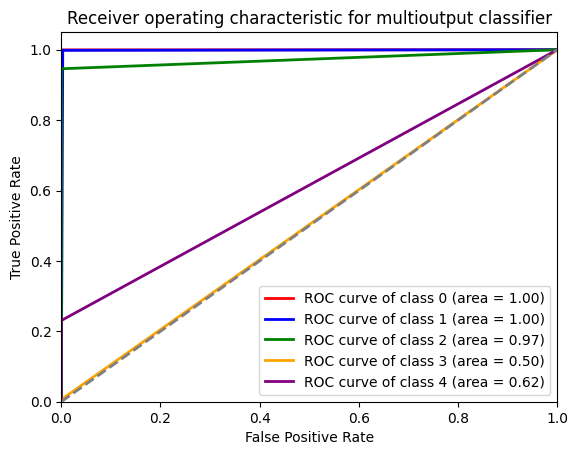

In [47]:
#decision tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
import time

start_time = time.time()
print()
clf = DecisionTreeClassifier()
# Call the fit_algo function with the Decision tree 
pred_now, acc_dt, acc_cv_dt, dt = fit_algo(MultiOutputClassifier(clf, n_jobs=-1),X,y_encoded,5)

dt_time = (time.time() - start_time)

#AUC 
AUC = np.round(roc_auc_score(y_encoded, pred_now,multi_class='ovr'), 3)
print('AUC:',AUC)
    
print("Accuracy(train data): %s" % acc_dt)
print("Accuracy(test data): %s" % acc_cv_dt)
print("Execution time: %s" % dt_time)

# roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:, i], pred_now[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green', 'orange', 'purple'] # adding more colors as there are more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multioutput classifier')
plt.legend(loc="lower right")
plt.show()


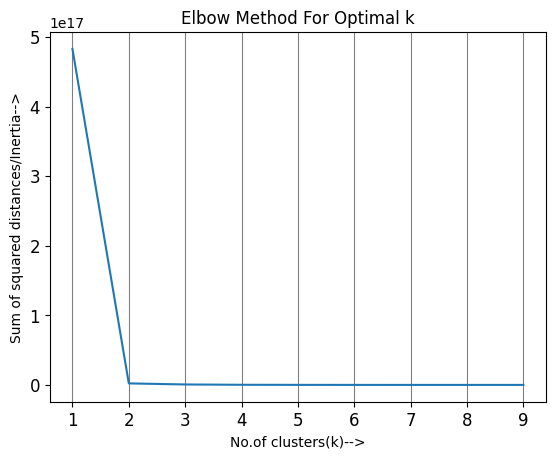

In [48]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances)

plt.xlabel('No.of clusters(k)-->') 
plt.ylabel('Sum of squared distances/Inertia-->') 
plt.title('Elbow Method For Optimal k')
plt.xticks(fontsize=12,color='black')
plt.yticks(fontsize=12,color='black')
plt.grid(which='both',color ='black',axis='x',alpha=0.5)
plt.show()

Confusion matrics: [[[     0  97278]
  [     1 396742]]

 [[396742      1]
  [ 97278      0]]]
Sensitivity(True positive rate): 0.49999873973831926
Specificity(True negative rate): 0.49999873973831926
FAR(False positive or acceptance rate ): 0.19691268184955701
Matthews Corellation Coefficient: 569.9694855086119
FPR(False positive rate): 0.5000012602616807
AUC score: 0.49999873973831926
Accuracy(train data): -2.2206338006229686e+17
Accuracy(test data): 80.31
Execution time: 6.653867244720459


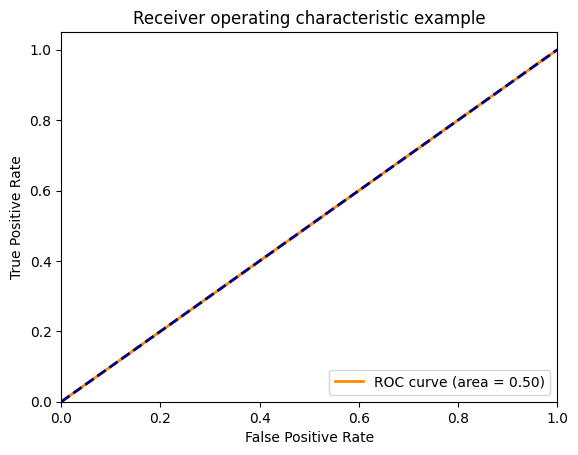

In [52]:
# kmeans
from sklearn.preprocessing import LabelEncoder,normalize
from sklearn.cluster import KMeans

# Convert labels to binary as kmeans cant handle multioutput classifier
y_binary = (y == 'normal').astype(int)

# set the optimal number of clusters based on the elbow curve
start_time = time.time()

# Call the fit_algo function with the kmeans model
pred_now, acc_kmean, acc_cv_kmean, kmeans= fit_algo(KMeans(n_clusters=2),X,y_binary,5)


kmean_time = (time.time() - start_time)
auc_score = roc_auc_score(y_binary, pred_now)
print("AUC score:", auc_score)

print("Accuracy(train data): %s" % acc_kmean)
print("Accuracy(test data): %s" % acc_cv_kmean)
print("Execution time: %s" % kmean_time)

# Compute ROC curve and ROC area for each class
fpr, tpr, threshold = roc_curve(y_binary,pred_now)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [55]:
y_binary

0         1
1         1
2         1
3         1
4         1
         ..
494016    1
494017    1
494018    1
494019    1
494020    1
Name: Attack Type, Length: 494021, dtype: int32

Confusion matrics: [[[ 68301  34262]
  [  2603 388855]]

 [[367952  28791]
  [  4674  92604]]

 [[457881  32033]
  [  1819   2288]]

 [[475216  17679]
  [   463    663]]

 [[453690  40279]
  [     3     49]]]
Sensitivity(True positive rate): 0.8067035828600468
Specificity(True negative rate): 0.882115868341313
FAR(False positive or acceptance rate ): 0.06582959024009101
Accuracy (test data): 0.934170409759909
Matthews Corellation Coefficient: nan
FPR(False positive rate): 0.11788413165868719
AUC: 0.844
Accuracy(train data): 80.94
Execution time: 6.439937114715576


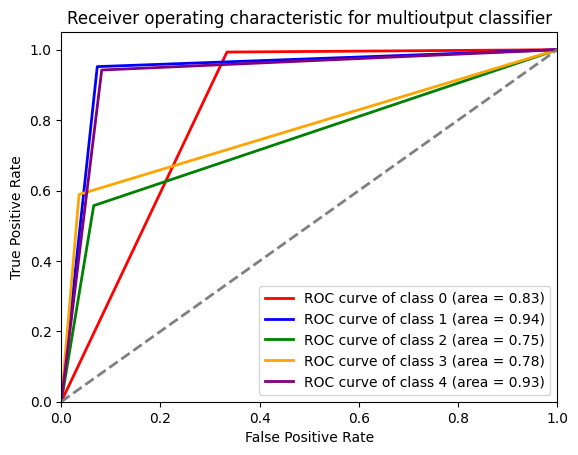

In [49]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
start_time = time.time()

# Call the fit_algo function with the naive bayes model
clf=GaussianNB()
pred_now, acc_gnb, acc_cv_gnb, gnb= fit_algo(MultiOutputClassifier(clf, n_jobs=-1),X,y_encoded,5)

gnb_time = (time.time() - start_time)

#AUC 
AUC = np.round(roc_auc_score(y_encoded, pred_now,multi_class='ovr'), 3)
print('AUC:',AUC)
print("Accuracy(train data): %s" % acc_gnb)
print("Accuracy(test data): %s" % acc_cv_gnb)
print("Execution time: %s" % gnb_time)

# roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:, i], pred_now[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green', 'orange', 'purple'] # add more colors if there are more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multioutput classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# SVM
from sklearn.svm import LinearSVC
start_time = time.time()
clf = LinearSVC()
# Call the fit_algo function with the SVM model
pred_now, acc_svc, acc_cv_svc, svc= fit_algo(MultiOutputClassifier(clf, n_jobs=-1),X,y_encoded,5)

svc_time = (time.time() - start_time)

#AUC 
AUC = np.round(roc_auc_score(y_encoded, pred_now,multi_class='ovr'), 3)
print('AUC:',AUC)
print("Accuracy (train data): %s" % acc_svc)
print("Accuracy(test data): %s" % acc_cv_svc)
print("Execution time: %s" % svc_time)


# roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:, i], pred_now[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green', 'orange', 'purple'] # add more colors if there are more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multioutput classifier')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#ANN
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes = (20,), activation='relu', solver='adam')
start_time = time.time()
pred_now, acc_nn, acc_cv_nn, nn = fit_algo(MultiOutputClassifier(clf, n_jobs=-1),X,y_encoded,5)

nn_time = (time.time() - start_time)

#AUC 
AUC = np.round(roc_auc_score(y_encoded, pred_now,multi_class='ovr'), 3)
print('AUC:',AUC)
print("Accuracy(train data): %s" % acc_nn)
print("Accuracy(test data): %s" % acc_cv_nn)
print("Execution time: %s" % nn_time)


# roc_curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_encoded.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_encoded[:, i], pred_now[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
colors = ['red', 'blue', 'green', 'orange', 'purple'] # add more colors if there are more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multioutput classifier')
plt.legend(loc="lower right")
plt.show()
